In [13]:
import numpy as np
from scipy import linalg, sparse
import scipy
import matplotlib.pyplot as plt

In [14]:
from IPython.display import Image
Image(url= "SciPy LinAlg Intro.jpg", width=1200, height=1200) 

In [6]:
Image(url= "Norms Ref.jpg", width=1200, height=1200) 

In [ ]:
linalg.norm(A, 'fro') #frobenius norm is the default
linalg.norm(A, 1) #L1 norm (max column sum)
linalg.norm(A, np.inf) # L inf norm (max row sum)


In [3]:
Image(url= "Gen Inverse.jpg", width=1200, height=1200) 

In [15]:
f = np.poly1d([5, 1])
x = np.linspace(0, 10, 30)
y = f(x) + 6*np.random.normal(size=len(x))


#Two ways to do OLS
A = np.vstack([x, np.ones(len(x))]).T
np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, y)) 
#Should return slope and intercept for linear-fit by computing [(A^TA)^-1]A^Ty= b

array([ 5.58713614, -1.86332871])

In [16]:
np.linalg.lstsq(A, y)[0]

<ipython-input-16-c815b938290b>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(A, y)[0]


array([ 5.58713614, -1.86332871])

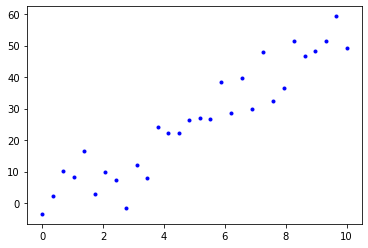

In [17]:
plt.plot(x, y, '.b')
plt.show()

In [7]:
def leastsq1(x):
    A = np.vstack([x, np.ones(len(x))]).T
    return np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, y))

def leastsq2(x):
    A = np.vstack([x, np.ones(len(x))]).T
    return np.linalg.lstsq(np.vstack([x, np.ones(len(x))]).T, y)[0]

def leastsq3(x):
    return np.polyfit(x, y, 1)

In [8]:
%timeit leastsq1(x)

12.2 µs ± 98.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
%timeit leastsq2(x)

<ipython-input-7-1f920864d4fc>:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(np.vstack([x, np.ones(len(x))]).T, y)[0]


26.1 µs ± 2.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
%timeit leastsq3(x)

36.1 µs ± 1.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [58]:
Image(url= "SciPy Special Matrices.jpg", width=1200, height=1200) 

In [ ]:
# Create a dense meshgrid
np.mgrid[1:11:2, -12:-3:3]

# Create an open meshgrid
np.ogrid[1:11:2, -12:-3:3]

# Stack arrays vertically
np.r_[3,[0]*5,-1:1:10j]

# Stack arrays horizontally 
np.c_[array, my_2dArray]

In [ ]:
# Create a 2X2 identity matrix
np.eye(3, k=1)        

# Create a 2x2 identity matrix
np.mat(np.identity(2))         

# Compressed Sparse Row matrix, scipy uses the ARPACK for finding eigenvalues of sparse matrices efficiently.
sparse.csr_matrix(C) 

# Compressed Sparse Column matrix
sparse.csc_matrix(C)  

# Dictionary Of Keys matrix
sparse.dok_matrix(C)  

In [ ]:
#scipy.linalg supports all of the common matrix factorizations: LU, QR, Cholesky, Schur and the most important of all...

In [ ]:
# Singular Value Decomposition, returns singular values as an array.
U,s,Vh = linalg.svd(myMatrix) 

# Initialize `M` and `N`
M,N = myMatrix.shape

# Construct sigma matrix in SVD, i.e. an M-by-N matrix with the singular values on the diagonal.
Sig = linalg.diagsvd(s,M,N)

In [68]:
Image(url= "Four Subspaces.png", width=1200, height=1200) 

In [70]:
%%html
<a href="https://en.wikipedia.org/wiki/Eigenface#Connection_with_SVD"> 
Eigenfaces and the SVD</a>

In [59]:
Image(url= "Matrix Functions.jpg", width=1200, height=1200) 

In [60]:
Image(url= "Arb Functions.jpg", width=1200, height=1200) 

In [ ]:
linalg.expm
linalg.logm
linalg.sinm
linalg.cosm
linalg.tanm

In [61]:
from scipy import special, linalg
rng = np.random.default_rng()
A = rng.random((3, 3))
B = linalg.funm(A, lambda x: special.jv(0, x))#special.jv are the Bessel Functions from mathematical physics.
A

array([[0.78536742, 0.79819691, 0.34988952],
       [0.95648053, 0.87452569, 0.79323603],
       [0.59438364, 0.46936393, 0.52242528]])

In [62]:
B

array([[ 0.69893853, -0.28319806, -0.20600032],
       [-0.39069907,  0.64001626, -0.27450042],
       [-0.23282164, -0.21408756,  0.83792141]])

In [63]:
linalg.eigvals(A)

array([2.0859138+0.j        , 0.0482023+0.08266913j,
       0.0482023-0.08266913j])

In [64]:
special.jv(0, linalg.eigvals(A))

array([0.17462219-4.22940923e-17j, 1.00112701-1.99354439e-03j,
       1.00112701+1.99354439e-03j])

In [65]:
linalg.eigvals(B)
#Note how, by virtue of how matrix analytic functions are defined, the Bessel function has acted on the matrix eigenvalues

array([0.17462219+0.j        , 1.00112701+0.00199354j,
       1.00112701-0.00199354j])

In [1]:
%%html
<a href="https://en.wikipedia.org/wiki/Marchenko%E2%80%93Pastur_distribution"> 
Spectral Distributionfor eigenvalues of Covariance Matrices</a>

In [2]:
%%html
<a href="https://en.wikipedia.org/wiki/Wigner_semicircle_distribution"> 
Spectral Distribution for eigenvalues of symmetric matrices</a>

In [30]:
Image(url= "Randon Matrix Laws.jpg", width=1200, height=1200)

In [49]:
def randcv(n, p, s,
    t="N",
    f=None):
    """
    s number of covariance matrices of random matrices of n x p shape

    t: N for normal, B for binary distribution [0,1] 

    f: Filter. Z0 , Z1 for zscore on axis 0 or 1

    Returns  s x n x n array
    """
    r=[]
    for i in range(s):
        x=np.random.normal(size=(n,p))
        if t == "B":
            x=x>0.5
        if f == "Z0":
            x=scipy.stats.zscore(x, axis=0)
        elif f == "Z1":
            x=scipy.stats.zscore(x, axis=1)
        r.append(np.cov(x))
    return np.array(r)

In [50]:
def marchpast(l, g):
    "Marchenko-Pastur distribution"
    def m0(a):
        "Element wise maximum of (a,0)"
        return np.maximum(a, np.zeros_like(a))
    gplus=(1+g**0.5)**2
    gminus=(1-g**0.5)**2
    return np.sqrt(  m0(gplus  - l) *  m0(l- gminus)) / ( 2*np.pi*g*l)

In [56]:
def EE(a, gamma):
    "Calculate and show histogram of eigenvalues"
    ee, ev=np.linalg.eigh(a)
    nn, bb, patches=plt.hist(ee.ravel(), 
                                bins="auto", 
                                density=True)
    x=np.arange(bb[0], bb[-1], 0.003)
    plt.plot(x, marchpast(x, gamma))
    plt.ylim(top=nn[1:].max() * 1.1)
    plt.title('Empirical Distribution of Eigenvalues compared to Marchenko-Pastur Law')
    plt.show()
    

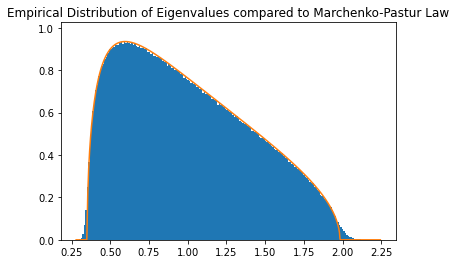

In [57]:
EE(randcv(50,300,50000, "N"), 5.0/30.)

In [18]:
myMatrix = np.matrix(np.random.random((5,5)))
linalg.funm(myMatrix, lambda x: x*x)


array([[0.95004236, 0.5871642 , 0.99634948, 0.42886576, 0.41489202],
       [1.3367011 , 0.87448652, 1.6514344 , 0.83377426, 0.58270242],
       [1.51361165, 1.17046295, 1.69794202, 1.05845721, 0.57539404],
       [1.01751029, 0.78182491, 1.20835751, 0.79754964, 0.46847073],
       [1.62972639, 0.95200482, 1.7845697 , 0.99201685, 0.59468563]])

In [25]:
#myMatrix.T
#myMatrix.H
myMatrix.I

matrix([[ 1.00000000e+00,  3.33066907e-16, -5.55111512e-17,
         -1.11022302e-16,  5.55111512e-17],
        [ 2.68882139e-17,  1.00000000e+00,  6.93889390e-18,
          8.32667268e-17, -3.12250226e-17],
        [ 5.55111512e-17,  0.00000000e+00,  1.00000000e+00,
          3.33066907e-16,  2.22044605e-16],
        [ 1.66533454e-16,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00, -4.44089210e-16],
        [ 1.04083409e-16,  5.55111512e-17,  1.11022302e-16,
          2.22044605e-16,  1.00000000e+00]])

In [ ]:
# Vector dot product
vectorDotProduct = np.vdot(vector1, vector2)

# Inner product
innerProduct = np.inner(vector1, vector2)

# Outer product
outerProduct = np.outer(vector1, vector2)

# Tensor dot product
tensorDotProduct = np.tensordot(matrix1, matrix2)

# Kronecker product
kronProduct = np.kron(matrix1, matrix2)

In [11]:
%%html
<a href="https://en.wikipedia.org/wiki/Einstein_notation#Common_operations_in_this_notation"> 
Common Operations in Eistein Notation</a>

In [ ]:
#This function requires two arguments, first is called “subscript”, second is called “operands”
# Here we use i and j to represent the dimensions of the operand x , k and j to represent dimensions of the operand y . 
# And we specify the output matrix to be in the dimension i * k.


In [21]:
x = np.random.rand(2,3)
y = np.random.rand(5,3)
np.einsum('ij,kj -> ik',x,y)

array([[1.43491565, 1.09282743, 1.24963153, 0.7998653 , 1.01706838],
       [1.16073186, 1.03088883, 1.24975514, 0.49499477, 0.73509429]])

In [22]:
x = np.random.rand(2,3)
np.einsum('ij -> ji',x)   # transpose
np.einsum('ij ->',x)    # sum
np.einsum('ij -> i',x)   # column sum
np.einsum('ij -> j',x)  # row sum

x = np.random.rand(2,3)
y = np.random.rand(5,3)
np.einsum('ij,kj -> ik',x,y)  # matrix multiplication

a = np.array([4,5,6])
b = np.array([7,8,9])
np.einsum('i,i ->',a,b)   # inner product
np.einsum('i,j ->ij',a,b)  # outer product
np.einsum('i,i ->i',a,b)   # hadamard product

y = np.random.rand(5,3)
np.einsum('ij -> j',y)   # diagonal
np.einsum('ij ->',y)   # trace

7.408719473496826